# Basic Image Classification with Keras / Tensorflow 2 in Python

### Based on original code from https://towardsdatascience.com/medical-images-segmentation-using-keras-7dc3be5a8524

### cifar10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [38]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, applications
import matplotlib.pyplot as plt

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.6.0


## Load the CIFAR10 dataset from the Keras online collection

You might have noticed that Keras is a part of Tensorflow, and includes standard datasets that can be downloaded easily. 

In [39]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


## Explore the training dataset

In [40]:
print('train_images:')
print(f'  Type: {type(train_images)}, {train_images.dtype}')
print(f'  Shape: {train_images.shape}')
print(f'  Min/Max: {train_images.min()} / {train_images.max()}\n')

print('train_labels:')
print(f'  Type: {type(train_labels)}, {train_labels.dtype}')
print(f'  Shape: {train_labels.shape}')
print(f'  Min/Max: {train_labels.min()} / {train_labels.max()}\n')


train_images:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (50000, 32, 32, 3)
  Min/Max: 0 / 255

train_labels:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (50000, 1)
  Min/Max: 0 / 9



## Explore the test dataset

In [4]:
print('test_images:')
print(f'  Type: {type(test_images)}, {test_images.dtype}')
print(f'  Shape: {test_images.shape}')
print(f'  Min/Max: {test_images.min()} / {test_images.max()}\n')

print('test_labels:')
print(f'  Type: {type(test_labels)}, {test_images.dtype}')
print(f'  Shape: {test_labels.shape}')
print(f'  Min/Max: {test_labels.min()} / {test_labels.max()}\n')

test_images:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (10000, 32, 32, 3)
  Min/Max: 0 / 255

test_labels:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (10000, 1)
  Min/Max: 0 / 9



## Normalise the image data and display 25 sample images and their labels

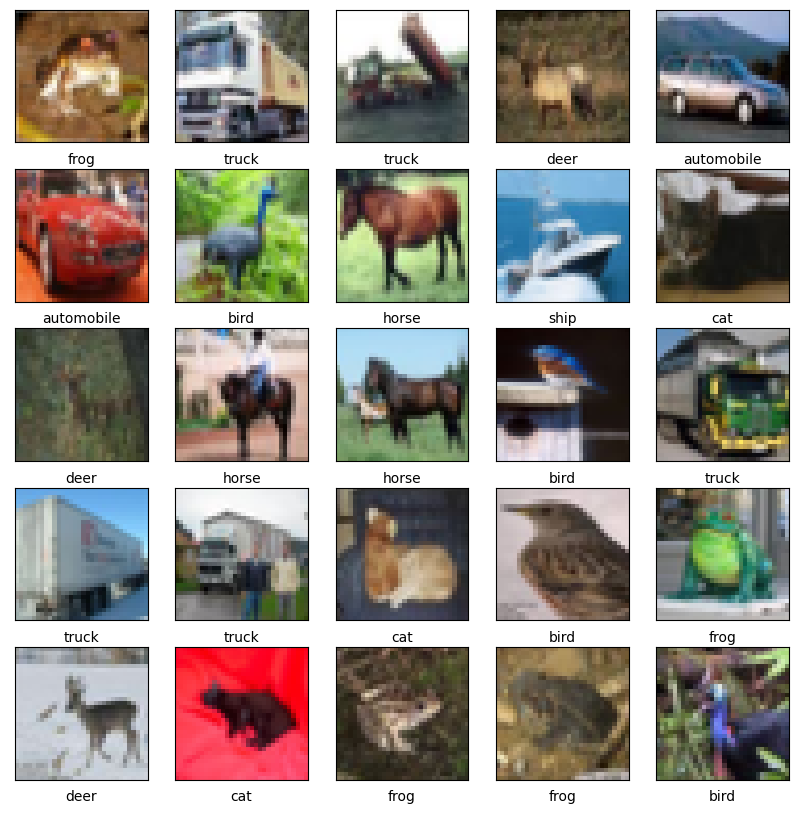

In [41]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    plt.xlabel(class_names[train_labels[i][0]])
    # thats why you need the extra index--^^^
plt.show()

### These are the class names annotating each image 

### You might have heard of the early CNN we are going to use:  LeNet-5

<img src='images/lecun1998.png' width=800>

<img src='images/lenet_architecture.png' width-800>



In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

## Train the model - ie fit the model to the training data

In [43]:
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels)
                   )

Epoch 1/3
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5185 - accuracy: 0.4423 - val_loss: 1.2445 - val_accuracy: 0.5490
Epoch 2/3
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1407 - accuracy: 0.5943 - val_loss: 1.0398 - val_accuracy: 0.6290
Epoch 3/3
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9812 - accuracy: 0.6536 - val_loss: 0.9860 - val_accuracy: 0.6501


## Show the output from trained model

In [44]:
result = model.predict(test_images[50:51])
print(result)

[[ 0.4969867  -0.26900962 -0.42950228 -1.311254   -1.4762603  -1.6181204
  -1.5509508   0.7543209  -1.3619982   1.2146965 ]]


In [45]:
np.argmax(result)

9

### So what does index 0 refer to?

In [46]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [47]:
class_names[ np.argmax(result) ]

'truck'

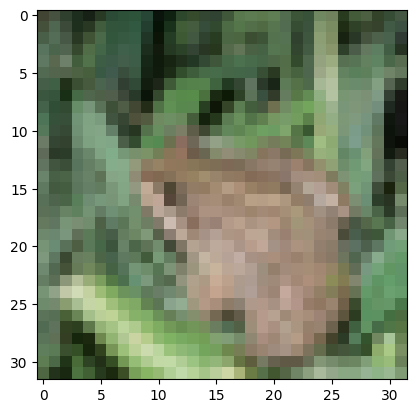

Label: frog
Model says: deer


In [49]:
img_no = 4
plt.imshow(test_images[img_no])
plt.show()

print(f'Label: {class_names[test_labels[img_no][0]]}')

result = model.predict(test_images[img_no:img_no+1])
print(f'Model says: {class_names[ np.argmax(result) ]}')


### Adjust the dataset to make a simple 'Frog or Dog' AI

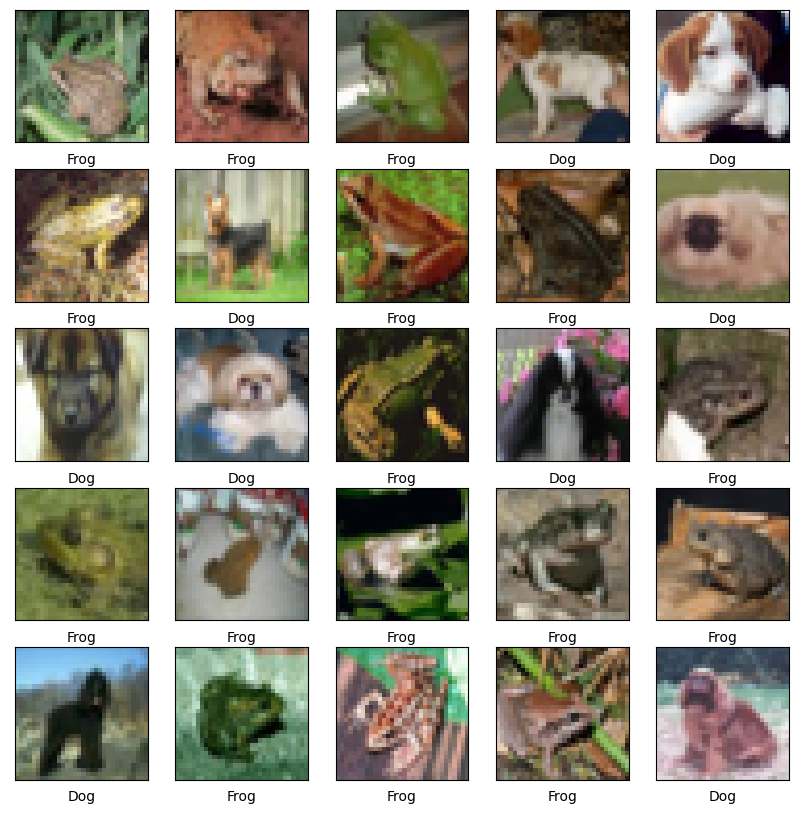

In [50]:
# Make a 'limited' dataset copy and work with that data
# fd_train_labels ie FrogDog
fd_train_labels = np.zeros((10000,1)).astype(np.int8)
fd_train_images = np.empty((10000,32,32,3))
idx = 0
for i, item in enumerate(train_labels):
    if item in [5,6]:
        if item == 5: # DOG
            fd_train_labels[idx,0] = 1
        elif item == 6: # FROG
            fd_train_labels[idx,0] = 0

        fd_train_images[idx,:,:,:] = train_images[i,:,:,:]
        idx += 1

fd_test_labels = np.zeros((10000,1)).astype(np.int8)
fd_test_images = np.empty((10000,32,32,3))
idx = 0
for i, item in enumerate(test_labels):
    if item in [5,6]:
        if item == 5: # DOG
            fd_test_labels[idx,0] = 1
        elif item == 6: # FROG
            fd_test_labels[idx,0] = 0
        fd_test_images[idx,:,:,:] = test_images[i,:,:,:]
        idx += 1


new_names = ['Frog', 'Dog']


# Display & Check the altered dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fd_test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    plt.xlabel(new_names[fd_test_labels[i,0]])
plt.show()

## Define the 'Frog or Not' model

In [51]:
model_frogdog = models.Sequential()
model_frogdog.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_frogdog.add(layers.MaxPooling2D((2, 2)))
model_frogdog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_frogdog.add(layers.MaxPooling2D((2, 2)))
model_frogdog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_frogdog.add(layers.Flatten())
model_frogdog.add(layers.Dense(120, activation='relu'))
model_frogdog.add(layers.Dense(84, activation='relu'))
model_frogdog.add(layers.Dense(2))

model_frogdog.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the model

In [36]:
history = model_frogdog.fit(fd_train_images, fd_train_labels, epochs=6,
                    validation_data=(fd_test_images, fd_test_labels))

Epoch 1/6
313/313 [==============================] - 6s 18ms/step - loss: 0.1009 - accuracy: 0.9582 - val_loss: 0.0504 - val_accuracy: 0.9817
Epoch 2/6
313/313 [==============================] - 6s 18ms/step - loss: 0.0778 - accuracy: 0.9705 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 3/6
313/313 [==============================] - 6s 18ms/step - loss: 0.0782 - accuracy: 0.9713 - val_loss: 0.1182 - val_accuracy: 0.9841
Epoch 4/6
313/313 [==============================] - 6s 18ms/step - loss: 0.0602 - accuracy: 0.9756 - val_loss: 0.0650 - val_accuracy: 0.9836
Epoch 5/6
313/313 [==============================] - 6s 18ms/step - loss: 0.0698 - accuracy: 0.9734 - val_loss: 0.2384 - val_accuracy: 0.9829
Epoch 6/6
313/313 [==============================] - 6s 18ms/step - loss: 0.0339 - accuracy: 0.9876 - val_loss: 0.0610 - val_accuracy: 0.9850


In [52]:
# model.input_shape
model_frogdog.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)              

### The model output is a 2 number array - one number for each label [ frog, dog ]

This matches the format of the labels originally used to train the model.

In [53]:
model_frogdog.predict(fd_test_images[1:2])

array([[ 0.09261026, -0.12841675]], dtype=float32)

List of names: ['Frog', 'Dog']


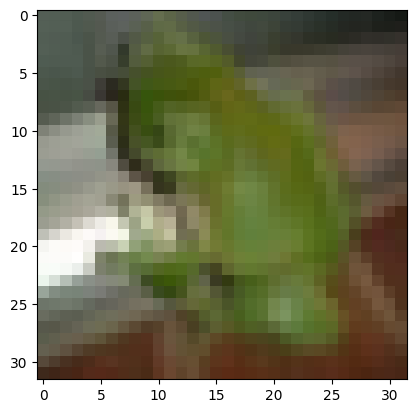

Label: Frog


In [55]:
print(f'List of names: {new_names}')
plt.imshow(fd_test_images[2])
plt.show()
print(f'Label: {new_names[fd_test_labels[1][0]]}')

In [56]:
model_frogdog.predict(fd_test_images[2:3])

array([[ 0.04530069, -0.04510907]], dtype=float32)

## Let's make this easier to read by showing the model output with the picture and result

We can wrap this all up in a simple function - let's call it 'infer'

In [57]:
def infer(img_no):
    img_arr = fd_test_images[img_no]

    plt.figure(figsize=(4, 2))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_arr, cmap=plt.cm.binary)
    plt.xlabel(new_names[fd_test_labels[img_no][0]])

    plt.show()

    result = model_frogdog.predict(fd_test_images[img_no:img_no+1])
    print(f'Inference: {new_names[np.argmax(result)]}\t({result[0,0]:0.2f}, {result[0,1]:0.2f})')


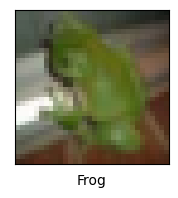

Inference: Frog	(0.05, -0.05)


In [58]:
infer(2)


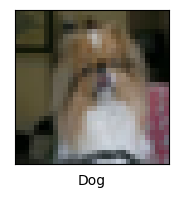

Inference: Frog	(0.10, -0.17)


In [62]:
infer(1000)

## Great! Let's check more...

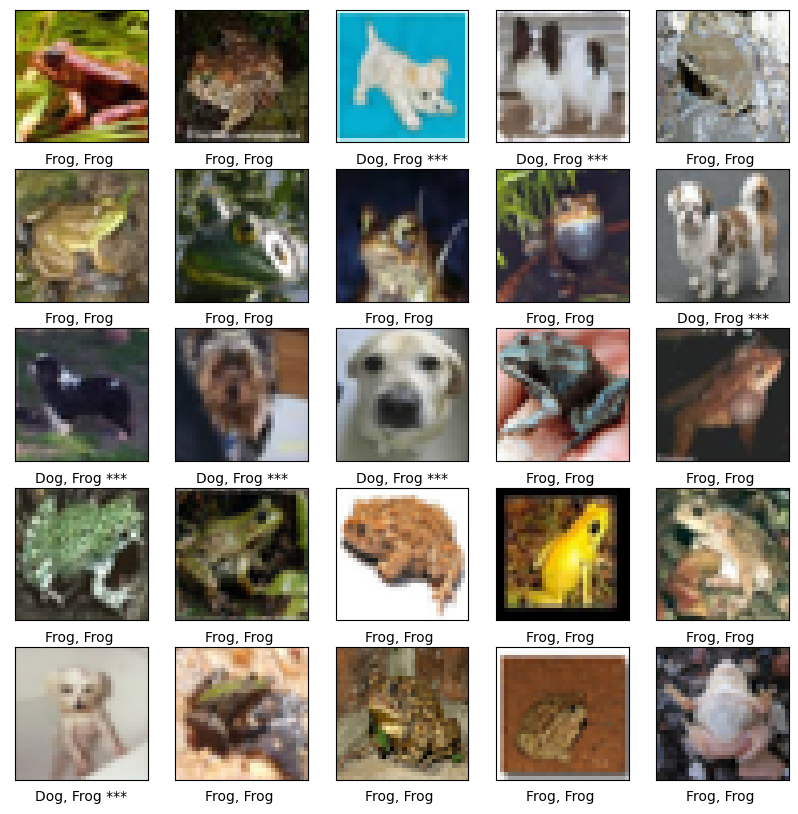

In [63]:
# Display & Check the altered dataset
plt.figure(figsize=(10,10))
base = 200
for i in range(25):
    img = base + i
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fd_test_images[base + i], cmap=plt.cm.binary)

    true_label = new_names[fd_test_labels[img,0]]

    result = model_frogdog.predict(fd_test_images[img:img+1])
    ai_output = new_names[np.argmax(result)]
    if true_label != ai_output:
        suffix = '***'
    else:
        suffix = ''
    plt.xlabel(f'{true_label}, {ai_output} {suffix}')
plt.show()

## Save the Model

In [37]:
import os
from pathlib import Path

print(f'Current Directory: {os.getcwd()}')

# Make sure the save directory exists
new_dir = Path('saved_models')
new_dir.mkdir(exist_ok=True)

# Save the entire model as a SavedModel.
# This should work on all operating systems.
model_frogdog.save('saved_models/frogdog_model')

Current Directory: C:\Users\oli_n\pycode\R4-Teaching\03_Train_a_CNN
INFO:tensorflow:Assets written to: saved_models/frogdog_model_good\assets


## Test with outside images

### Load the images

In [64]:
from PIL import Image
from pathlib import Path

# Pathlib helps make this code run on different operating systems
img_dir = Path('internet_images')

internet_frog = Image.open(img_dir / Path('frog.jpg'))
internet_merlion = Image.open(img_dir / Path('dog.jpg'))
internet_kermit = Image.open(img_dir / Path('kermit.jpg'))


### Display the three new images

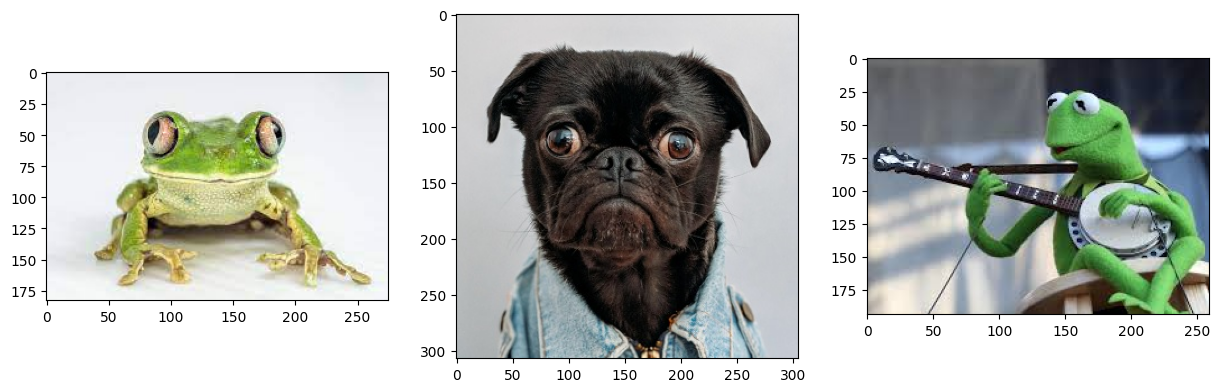

In [65]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(internet_frog)
plt.subplot(1,3,2)
plt.imshow(internet_merlion)
plt.subplot(1,3,3)
plt.imshow(internet_kermit)
plt.show()

### Convert images to fit the input requirements of the AI: 32 x 32 x 3

In [31]:
import numpy as np

internet_frog_small = internet_frog.resize((32,32))
internet_merlion_small = internet_merlion.resize((32,32))
internet_kermit_small = internet_kermit.resize((32,32))


new_imgs = np.stack([np.asarray(internet_frog_small),
                     np.asarray(internet_merlion_small),
                     np.asarray(internet_kermit_small)],
                    axis=0)
new_imgs.shape

(3, 32, 32, 3)

In [32]:
new_imgs.min(), new_imgs.max()

(0, 255)

## Make example processing easy with a function - let's call this one `infer_img()` which takes an iterable container containing images.

Note that is_Frog is considered 'True' if the right hand number is higher.

`normalise()` is a function that converts values in the image files (we know these range from 0 upto 255) to 0 to 1.

In [66]:
import numpy as np


def normalise(in_img):
    # Assume 0 to max.
    normalised_img = in_img / in_img.max()
    return normalised_img


def infer_img(img):

    for i, im in enumerate(img):
        plt.figure(figsize=(4, 2))

        plt.xticks([])
        plt.yticks([])
        plt.imshow(im, cmap=plt.cm.binary)
        plt.show()

        output = model_frogdog.predict(img[i:i+1])
        if output[0,1] > output[0,0]:
            ai_output = 'DOG'
        else:
            ai_output = 'FROG'

        print(f'Inference: {output}, AI says: {ai_output}')


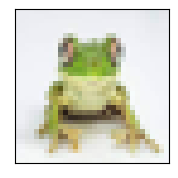

Inference: [[ 0.24609804 -0.2329276 ]], AI says: FROG


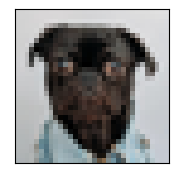

Inference: [[ 0.05351644 -0.07278416]], AI says: FROG


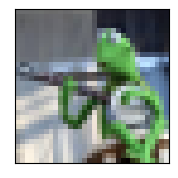

Inference: [[ 0.16576047 -0.1498146 ]], AI says: FROG


In [67]:

out = infer_img(normalise(new_imgs))

# Great! Let's see how to use this model in a 'real world' application in the next notebook:

# `Part 2 - Load FrogDog Model.ipynb`